# Deblurring

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2
import os
from scipy.fftpack import fftn, ifftn, fftshift

In [2]:
def gaussian_filter(k=5, sigma=1.0):
    arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx, arx)
    filt = np.exp(-(1/2) * (np.square(x) + np.square(y)) / np.square(sigma))
    return filt / np.sum(filt)

Text(0.5, 1.0, 'degraded/blurred image')

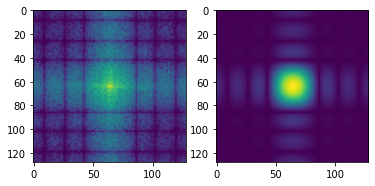

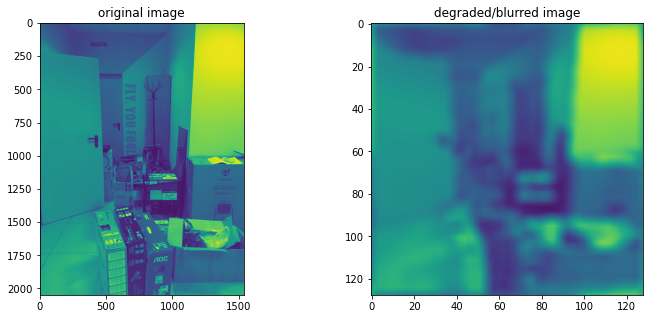

In [29]:
img_size=128
path=r"Dataset/sharp/0_IPHONE-SE_S.jpg"
img=cv2.imread(os.path.join(path))
f=cv2.imread(os.path.join(path), cv2.IMREAD_GRAYSCALE)
f_new= cv2.resize(f, (img_size, img_size))

h = gaussian_filter(k=7, sigma=2.7)

# computing the number of padding on one side
a = int(f_new.shape[0]//2 - h.shape[0]//2)
h_pad = np.pad(h, (a,a-1), 'constant', constant_values=(0))

# computing the Fourier transforms
F = fftn(f_new)
H = fftn(h_pad)



# convolution
G = np.multiply(F,H)

# Inverse Transform
# - we have to perform FFT shift before reconstructing the image in the space domain
g = fftshift(ifftn(G).real)

plt.subplot(121)
plt.imshow(fftshift(np.log(np.abs(G)+1)))
plt.subplot(122)
plt.imshow(fftshift(np.log(np.abs(H)+1)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(f, vmin=0, vmax=255); plt.title("original image")
plt.subplot(122)
plt.imshow(g, vmin=0, vmax=255); plt.title("degraded/blurred image")

(2048, 1536)


Text(0.5, 1.0, 'restored image')

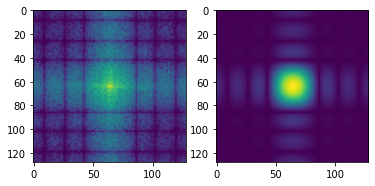

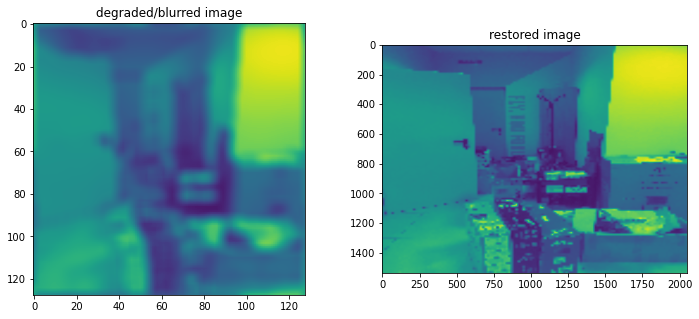

In [25]:
#F_hat = G/H
F_hat = np.divide(G,H)

f_hat = ifftn(F_hat).real
plt.subplot(121)
plt.imshow(fftshift(np.log(np.abs(G)+1)))
plt.subplot(122)
plt.imshow(fftshift(np.log(np.abs(H)+1)))
plt.figure(figsize=(12,5))
plt.subplot(121)
print(f.shape)
f_hat= cv2.resize(f_hat, f.shape)
plt.imshow(g, vmin=0, vmax=255); plt.title("degraded/blurred image")
plt.subplot(122)
plt.imshow(f_hat,  vmin=0, vmax=255); plt.title("restored image")